In [1]:
from datetime import datetime
from MetaTrader5 import *
MT5Initialize()
MT5WaitForTerminal()

print(MT5TerminalInfo())
print(MT5Version())

[2, 'MetaQuotes-Demo', '21592194']
[500, 2230, '18 Nov 2019']


In [2]:
rates = MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_D1, datetime(2000,1,1), datetime(2019,11,21))

In [3]:
import pandas as pd
d = pd.DataFrame(list(rates),
                           columns=['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'])

In [4]:
d['median']=(d['high']+d['low'])/2

In [5]:
d['delta'] = d['median'].diff(1).fillna(0)

In [6]:
d

,time,open,high,low,close,tick_volume,spread,real_volume,median,delta
0,2000-01-03,1.00730,1.02780,1.00540,1.02460,6642,50,0,1.016600,0.000000
1,2000-01-04,1.02430,1.03400,1.02130,1.02920,7339,50,0,1.027650,0.011050
2,2000-01-05,1.02930,1.04020,1.02840,1.03260,6570,50,0,1.034300,0.006650
3,2000-01-06,1.03250,1.04150,1.02720,1.03300,7223,50,0,1.034350,0.000050
4,2000-01-07,1.03290,1.03320,1.02600,1.02980,5689,50,0,1.029600,-0.004750
...,...,...,...,...,...,...,...,...,...,...
5166,2019-11-14,1.10052,1.10273,1.09890,1.10212,32577,1,0,1.100815,0.000040
5167,2019-11-15,1.10212,1.10567,1.10145,1.10515,27792,1,0,1.103560,0.002745
5168,2019-11-18,1.10510,1.10899,1.10477,1.10718,28482,1,0,1.106880,0.003320
5169,2019-11-19,1.10718,1.10838,1.10624,1.10780,26644,1,0,1.107310,0.000430


<IPython.core.display.Javascript object>


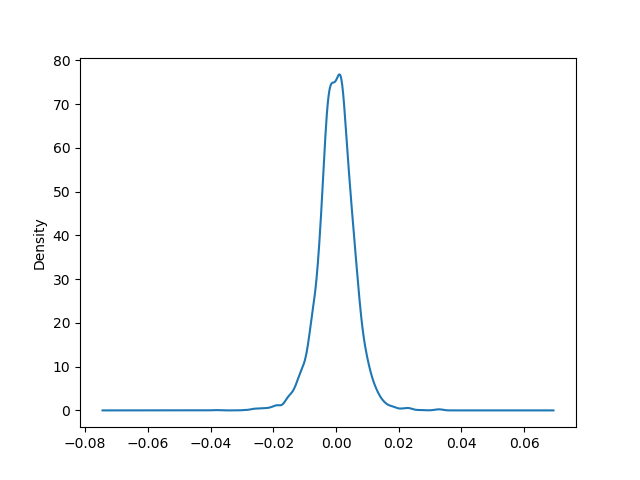

In [7]:
%matplotlib nbagg
d['delta'].plot.kde()

In [8]:
import numpy as np
as_strided = np.lib.stride_tricks.as_strided
ln=d['delta'].values
win = 5
v = as_strided(ln, (len(d) - (win - 1), win), (ln.strides * 2))
wn=pd.DataFrame(v,columns=['d1','d2','d3','d4','d5'])
wn

,d1,d2,d3,d4,d5
0,0.000000,0.011050,0.006650,0.000050,-0.004750
1,0.011050,0.006650,0.000050,-0.004750,-0.003800
2,0.006650,0.000050,-0.004750,-0.003800,0.003550
3,0.000050,-0.004750,-0.003800,0.003550,0.002200
4,-0.004750,-0.003800,0.003550,0.002200,-0.003900
...,...,...,...,...,...
5162,-0.002785,-0.000625,-0.000920,-0.001275,0.000040
5163,-0.000625,-0.000920,-0.001275,0.000040,0.002745
5164,-0.000920,-0.001275,0.000040,0.002745,0.003320
5165,-0.001275,0.000040,0.002745,0.003320,0.000430


In [9]:
from Bayesian import *

In [10]:
x=wn['d1']
y=wn['d2']
data = np.array([x, y])

robust_model = analyze_standard(data)
with robust_model:
    step = pm.Metropolis()
    robust_trace = pm.sample(500, tune=250, step=step, random_seed=21412, progressbar=False)

print(pm.summary(robust_trace))


rho __str__ = -0.2144021
sigma __str__ = [0.0001 0.001 ]


C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


cov __str__ = [[ 1.000000e-08 -2.144021e-08]
 [-2.144021e-08  1.000000e-06]]


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [r]
>Metropolis: [sigma]


sigma __str__ = [0.0001 0.001 ]
rho __str__ = -0.2144021
sigma __str__ = [0.0001 0.001 ]
rho __str__ = -0.2144021


C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


sigma __str__ = [1.613602   2.79839806]
rho __str__ = -0.2144021
sigma __str__ = [1.613602   2.79839806]
rho __str__ = -0.2144021
sigma __str__ = [1.613602   2.79839806]
rho __str__ = -0.2144021
sigma __str__ = [1.613602   2.79839806]
rho __str__ = 0.22813778128165743
sigma __str__ = [2.05789598 3.56426706]
rho __str__ = 0.22813778128165743
sigma __str__ = [2.54066098 4.98463354]
rho __str__ = 0.22813778128165743
sigma __str__ = [2.82897017 5.50591722]
rho __str__ = 0.22813778128165743
sigma __str__ = [0.0001 0.001 ]
rho __str__ = -0.2144021
sigma __str__ = [2.82897017 5.50591722]
rho __str__ = 0.22813778128165743
sigma __str__ = [0.0001 0.001 ]
rho __str__ = -0.2144021
sigma __str__ = [2.82897017 5.50591722]
rho __str__ = 0.22813778128165743
sigma __str__ = [0.0001 0.001 ]
rho __str__ = -0.2144021
sigma __str__ = [2.82897017 5.50591722]
rho __str__ = 0.22813778128165743
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.5678336920830948
sigma __str__ = [3.01631873 6.89981909]
rho __str__

sigma __str__ = [3.7808035  9.97164253]
rho __str__ = 0.2970759838868778
sigma __str__ = [4.91200118 9.94222634]
rho __str__ = 0.3149264437884659
sigma __str__ = [3.7808035  9.97164253]
rho __str__ = 0.2970759838868778
sigma __str__ = [4.91200118 9.94222634]
rho __str__ = 0.3149264437884659
sigma __str__ = [3.7808035  9.97164253]
rho __str__ = 0.2970759838868778
sigma __str__ = [4.91200118 9.94222634]
rho __str__ = 0.3149264437884659
sigma __str__ = [3.7808035  9.97164253]
rho __str__ = 0.2970759838868778
sigma __str__ = [4.91200118 9.94222634]
rho __str__ = 0.3149264437884659
sigma __str__ = [3.7808035  9.97164253]
rho __str__ = 0.3453819262185107
sigma __str__ = [4.3160583  9.99020309]
rho __str__ = 0.3149264437884659
sigma __str__ = [3.7808035  9.97164253]
rho __str__ = 0.3453819262185107
sigma __str__ = [4.3160583  9.99020309]
rho __str__ = 0.3149264437884659
sigma __str__ = [3.7808035  9.97164253]
rho __str__ = 0.3453819262185107
sigma __str__ = [4.3160583  9.99020309]
rho __str__

sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.3453819262185107
sigma __str__ = [4.3160583  9.99020309]
rho __str__ = 0.3149264437884659
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.3453819262185107
sigma __str__ = [4.3160583  9.99020309]
rho __str__ = 0.3149264437884659
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.3453819262185107
sigma __str__ = [4.3160583  9.99020309]
rho __str__ = 0.3149264437884659
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.3453819262185107
sigma __str__ = [4.3160583  9.99020309]
rho __str__ = 0.3149264437884659
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.3453819262185107
sigma __str__ = [4.3160583  9.99020309]
rho __str__ = 0.3149264437884659
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.3453819262185107
sigma __str__ = [4.3160583  9.99020309]
rho __str__ = 0.3149264437884659
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.3453819262185107
sigma __str__ = [4.3160583  9.99020309]
rho __str__

sigma __str__ = [4.3160583  9.99020309]
rho __str__ = 0.29038311201450895
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.43393398151026474
sigma __str__ = [4.3160583  9.99020309]
rho __str__ = 0.29038311201450895
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.43393398151026474
sigma __str__ = [4.3160583  9.99020309]
rho __str__ = 0.29038311201450895
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.43393398151026474
sigma __str__ = [4.3160583  9.99020309]
rho __str__ = 0.29038311201450895
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.43393398151026474
sigma __str__ = [4.3160583  9.99020309]
rho __str__ = 0.29038311201450895
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.43393398151026474
sigma __str__ = [4.3160583  9.99020309]
rho __str__ = 0.29038311201450895
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.43393398151026474
sigma __str__ = [4.3160583  9.99020309]
rho __str__ = 0.29038311201450895
sigma __str__ = [3.02608877 9.9947547 

sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ 

sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
sigma __str__ = [4.36574789 9.99748362]
rho __str_

sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42515045717782257
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42515045717782257
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42515045717782257
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42515045717782257
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42515045717782257
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29855837146796593
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29855837146796593
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42515045717782257
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29855837146796593
sigma __str__ = [3.02608877 9.9947547 ]
rho __

sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29841927922620637
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.4265432550438073
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29841927922620637
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.4265432550438073
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29841927922620637
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.4265432550438073
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29841927922620637
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.4265432550438073
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29841927922620637
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.4265432550438073
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29841927922620637
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.4265432550438073
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29841927922620637
sigma __str__ = [3.02608877 9.9947547 ]
rho 

sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.427686752268821
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.29623711364355776
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.427686752268821
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.427686752268821
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.29623711364355776
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.427686752268821
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.29623711364355776
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.427686752268821
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.29623711364355776
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.427686752268821
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.29623711364355776
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.427686752268821
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.29623711364355776
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ 

sigma __str__ = [2.7920939  9.99929763]
rho __str__ = 0.44400300945238114
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.30399390644993346
sigma __str__ = [2.7920939  9.99929763]
rho __str__ = 0.44400300945238114
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.30399390644993346
sigma __str__ = [2.7920939  9.99929763]
rho __str__ = 0.44400300945238114
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.30399390644993346
sigma __str__ = [2.7920939  9.99929763]
rho __str__ = 0.44400300945238114
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.30399390644993346
sigma __str__ = [2.7920939  9.99929763]
rho __str__ = 0.44400300945238114
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.30399390644993346
sigma __str__ = [2.7920939  9.99929763]
rho __str__ = 0.44400300945238114
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.30399390644993346
sigma __str__ = [2.7920939  9.99929763]
rho __str__ = 0.44400300945238114
sigma __str__ = [3.96308751 9.99691048

rho __str__ = 0.47865590928984336
sigma __str__ = [3.98343928 9.99766974]
rho __str__ = 0.3157568203438079
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.47865590928984336
sigma __str__ = [3.98343928 9.99766974]
rho __str__ = 0.3157568203438079
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.47865590928984336
sigma __str__ = [3.94255473 9.99874939]
rho __str__ = 0.3157568203438079
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.47865590928984336
sigma __str__ = [3.94255473 9.99874939]
rho __str__ = 0.3157568203438079
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.47865590928984336
sigma __str__ = [3.94255473 9.99874939]
rho __str__ = 0.3157568203438079
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.47865590928984336
sigma __str__ = [3.94255473 9.99874939]
rho __str__ = 0.3157568203438079
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.47865590928984336
sigma __str__ = [3.94255473 9.99874939]
rho __str__ = 0.3157568203438079
sigma __str

sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4916210436401308
sigma __str__ = [3.90213204 9.99722153]
rho __str__ = 0.3418795013655083
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4916210436401308
sigma __str__ = [3.90213204 9.99722153]
rho __str__ = 0.3418795013655083
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4916210436401308
sigma __str__ = [3.90213204 9.99722153]
rho __str__ = 0.3418795013655083
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4916210436401308
sigma __str__ = [3.90213204 9.99722153]
rho __str__ = 0.3418795013655083
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4916210436401308
sigma __str__ = [3.90213204 9.99722153]
rho __str__ = 0.3418795013655083
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4916210436401308
sigma __str__ = [3.90213204 9.99722153]
rho __str__ = 0.3418795013655083
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4916210436401308
sigma __str__ = [3.90213204 9.99722153]
rho __str__

sigma __str__ = [3.80666528 9.99404458]
rho __str__ = 0.3418795013655083
sigma __str__ = [3.80666528 9.99404458]
rho __str__ = 0.3418795013655083
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4934538805355955
sigma __str__ = [3.80666528 9.99404458]
rho __str__ = 0.3418795013655083
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4934538805355955
sigma __str__ = [3.80666528 9.99404458]
rho __str__ = 0.3418795013655083
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4934538805355955
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4934538805355955
sigma __str__ = [3.80666528 9.99404458]
rho __str__ = 0.3418795013655083
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4934538805355955
sigma __str__ = [3.80666528 9.99404458]
rho __str__ = 0.3418795013655083
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4934538805355955
sigma __str__ = [3.80666528 9.99404458]
rho __str__ = 0.3418795013655083
sigma __str__ = [2.63375371 9.991772  ]
rho __str__

The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


sigma __str__ = [3.6704399  9.98922271]
rho __str__ = 0.3418795013655083
sigma __str__ = [0.0001 0.001 ]
rho __str__ = -0.2144021
sigma __str__ = [0.0001 0.001 ]
rho __str__ = -0.2144021
               mean        sd  mc_error    hpd_2.5   hpd_97.5      n_eff  \
sigma__0   3.494669  0.644222  0.064391   2.633754   4.365748   1.085818   
sigma__1   9.995561  0.002371  0.000228   9.991772   9.999298   4.330293   
r          0.380747  0.073818  0.007380   0.296237   0.491621   1.091216   
cov__0_0  12.627731  4.537829  0.453561   6.936659  19.059755   1.096019   
cov__0_1  12.834807  0.397476  0.038653  12.043822  13.505233  10.364110   
cov__1_0  12.834807  0.397476  0.038653  12.043822  13.505233  10.364110   
cov__1_1  99.911253  0.047392  0.004562  99.835508  99.985953   4.330020   

              Rhat  
sigma__0  4.348308  
sigma__1  1.273371  
r         4.137734  
cov__0_0  4.143493  
cov__0_1  1.055784  
cov__1_0  1.055784  
cov__1_1  1.273390  


C:\Users\rando\Anaconda3\lib\site-packages\pymc3\stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
cov __str__ = [[ 9.15721327 12.83153002]
 [12.83153002 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
cov __str__ = [[ 9.15721327 12.83153002]
 [12.83153002 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
cov __str__ = [[ 9.15721327 12.83153002]
 [12.83153002 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
cov __str__ = [[ 9.15721327 12.83153002]
 [12.83153002 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
cov __str__ = [[ 9.15721327 12.83153002]
 [12.83153002 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
cov __str__ = [[ 9.15721327 12.83153002]
 [12.83153002 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
cov __str__ = [[ 9.15721327 12.83153002]
 [12.83153002 99.89512151]]

sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
cov __str__ = [[ 9.15721327 12.83153002]
 [12.83153002 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
cov __str__ = [[ 9.15721327 12.83153002]
 [12.83153002 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
cov __str__ = [[ 9.15721327 12.83153002]
 [12.83153002 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
cov __str__ = [[ 9.15721327 12.83153002]
 [12.83153002 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
cov __str__ = [[ 9.15721327 12.83153002]
 [12.83153002 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
cov __str__ = [[ 9.15721327 12.83153002]
 [12.83153002 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
cov __str__ = [[ 9.15721327 12.83153002]
 [12.83153002 99.89512151]]

sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.4265432550438073
cov __str__ = [[ 9.15721327 12.90080714]
 [12.90080714 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.4265432550438073
cov __str__ = [[ 9.15721327 12.90080714]
 [12.90080714 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.4265432550438073
cov __str__ = [[ 9.15721327 12.90080714]
 [12.90080714 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.4265432550438073
cov __str__ = [[ 9.15721327 12.90080714]
 [12.90080714 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.4265432550438073
cov __str__ = [[ 9.15721327 12.90080714]
 [12.90080714 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.4265432550438073
cov __str__ = [[ 9.15721327 12.90080714]
 [12.90080714 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.4265432550438073
cov __str__ = [[ 9.15721327 12.90080714]
 [12.90080714 99.89512151]]
sigma 

sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.427686752268821
cov __str__ = [[ 9.15721327 12.93539224]
 [12.93539224 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.427686752268821
cov __str__ = [[ 9.15721327 12.93539224]
 [12.93539224 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.43036254076692915
cov __str__ = [[ 9.15721327 13.0163215 ]
 [13.0163215  99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.43036254076692915
cov __str__ = [[ 9.15721327 13.0163215 ]
 [13.0163215  99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.43036254076692915
cov __str__ = [[ 9.15721327 13.0163215 ]
 [13.0163215  99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.43036254076692915
cov __str__ = [[ 9.15721327 13.0163215 ]
 [13.0163215  99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.43036254076692915
cov __str__ = [[ 9.15721327 13.0163215 ]
 [13.0163215  99.89512151]]
sig

cov __str__ = [[ 7.79578836 13.50523283]
 [13.50523283 99.98595308]]
sigma __str__ = [2.7920939  9.99929763]
rho __str__ = 0.483729485602761
cov __str__ = [[ 7.79578836 13.50523283]
 [13.50523283 99.98595308]]
sigma __str__ = [2.7920939  9.99929763]
rho __str__ = 0.483729485602761
cov __str__ = [[ 7.79578836 13.50523283]
 [13.50523283 99.98595308]]
sigma __str__ = [2.7920939  9.99929763]
rho __str__ = 0.483729485602761
cov __str__ = [[ 7.79578836 13.50523283]
 [13.50523283 99.98595308]]
sigma __str__ = [2.7920939  9.99929763]
rho __str__ = 0.483729485602761
cov __str__ = [[ 7.79578836 13.50523283]
 [13.50523283 99.98595308]]
sigma __str__ = [2.7920939  9.99929763]
rho __str__ = 0.483729485602761
cov __str__ = [[ 7.79578836 13.50523283]
 [13.50523283 99.98595308]]
sigma __str__ = [2.7920939  9.99929763]
rho __str__ = 0.483729485602761
cov __str__ = [[ 7.79578836 13.50523283]
 [13.50523283 99.98595308]]
sigma __str__ = [2.7920939  9.99929763]
rho __str__ = 0.483729485602761
cov __str__ =

sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4916210436401308
cov __str__ = [[ 6.93665863 12.93743381]
 [12.93743381 99.83550777]]
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4916210436401308
cov __str__ = [[ 6.93665863 12.93743381]
 [12.93743381 99.83550777]]
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4916210436401308
cov __str__ = [[ 6.93665863 12.93743381]
 [12.93743381 99.83550777]]
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4916210436401308
cov __str__ = [[ 6.93665863 12.93743381]
 [12.93743381 99.83550777]]
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4916210436401308
cov __str__ = [[ 6.93665863 12.93743381]
 [12.93743381 99.83550777]]
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4916210436401308
cov __str__ = [[ 6.93665863 12.93743381]
 [12.93743381 99.83550777]]
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4916210436401308
cov __str__ = [[ 6.93665863 12.93743381]
 [12.93743381 99.83550777]]
sigma 

sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
cov __str__ = [[19.05975465 13.12639418]
 [13.12639418 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
cov __str__ = [[19.05975465 13.12639418]
 [13.12639418 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
cov __str__ = [[19.05975465 13.12639418]
 [13.12639418 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
cov __str__ = [[19.05975465 13.12639418]
 [13.12639418 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
cov __str__ = [[19.05975465 13.12639418]
 [13.12639418 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
cov __str__ = [[19.05975465 13.12639418]
 [13.12639418 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
cov __str__ = [[19.05975465 13.12639418]
 [13.12639418 99.94967875]]
sigma __str__

sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
cov __str__ = [[19.05975465 13.12639418]
 [13.12639418 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
cov __str__ = [[19.05975465 13.12639418]
 [13.12639418 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
cov __str__ = [[19.05975465 13.12639418]
 [13.12639418 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
cov __str__ = [[19.05975465 13.12639418]
 [13.12639418 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
cov __str__ = [[19.05975465 13.12639418]
 [13.12639418 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
cov __str__ = [[19.05975465 13.12639418]
 [13.12639418 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
cov __str__ = [[19.05975465 13.12639418]
 [13.12639418 99.94967875]]
sigma __str__

sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29869176536147635
cov __str__ = [[19.05975465 13.03684806]
 [13.03684806 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29869176536147635
cov __str__ = [[19.05975465 13.03684806]
 [13.03684806 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29869176536147635
cov __str__ = [[19.05975465 13.03684806]
 [13.03684806 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29869176536147635
cov __str__ = [[19.05975465 13.03684806]
 [13.03684806 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29869176536147635
cov __str__ = [[19.05975465 13.03684806]
 [13.03684806 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29869176536147635
cov __str__ = [[19.05975465 13.03684806]
 [13.03684806 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29869176536147635
cov __str__ = [[19.05975465 13.03684806]
 [13.03684806 99.94967875]]

cov __str__ = [[15.13094642 11.5101665 ]
 [11.5101665  99.77418379]]
sigma __str__ = [3.88985172 9.98870281]
rho __str__ = 0.29623711364355776
cov __str__ = [[15.13094642 11.5101665 ]
 [11.5101665  99.77418379]]
sigma __str__ = [3.88985172 9.98870281]
rho __str__ = 0.29623711364355776
cov __str__ = [[15.13094642 11.5101665 ]
 [11.5101665  99.77418379]]
sigma __str__ = [3.98669491 9.99675002]
rho __str__ = 0.29623711364355776
cov __str__ = [[15.89373633 11.80623169]
 [11.80623169 99.93501089]]
sigma __str__ = [3.98669491 9.99675002]
rho __str__ = 0.29623711364355776
cov __str__ = [[15.89373633 11.80623169]
 [11.80623169 99.93501089]]
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.29623711364355776
cov __str__ = [[15.70606259 11.7365089 ]
 [11.7365089  99.93821908]]
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.29623711364355776
cov __str__ = [[15.70606259 11.7365089 ]
 [11.7365089  99.93821908]]
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.29623711364355776

sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.3100681132620789
cov __str__ = [[15.70606259 12.28447417]
 [12.28447417 99.93821908]]
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.3100681132620789
cov __str__ = [[15.70606259 12.28447417]
 [12.28447417 99.93821908]]
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.3100681132620789
cov __str__ = [[15.70606259 12.28447417]
 [12.28447417 99.93821908]]
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.3157568203438079
cov __str__ = [[15.70606259 12.50985296]
 [12.50985296 99.93821908]]
sigma __str__ = [3.98343928 9.99766974]
rho __str__ = 0.3157568203438079
cov __str__ = [[15.86778849 12.57505021]
 [12.57505021 99.95340023]]
sigma __str__ = [3.98343928 9.99766974]
rho __str__ = 0.3157568203438079
cov __str__ = [[15.86778849 12.57505021]
 [12.57505021 99.95340023]]
sigma __str__ = [3.98343928 9.99766974]
rho __str__ = 0.3157568203438079
cov __str__ = [[15.86778849 12.57505021]
 [12.57505021 99.95340023]]
sigma 

rho __str__ = 0.3157568203438079
cov __str__ = [[15.52870974 12.44126672]
 [12.44126672 99.97429468]]
sigma __str__ = [3.94064839 9.99871465]
rho __str__ = 0.3157568203438079
cov __str__ = [[15.52870974 12.44126672]
 [12.44126672 99.97429468]]
sigma __str__ = [3.94064839 9.99871465]
rho __str__ = 0.3157568203438079
cov __str__ = [[15.52870974 12.44126672]
 [12.44126672 99.97429468]]
sigma __str__ = [3.94064839 9.99871465]
rho __str__ = 0.3157568203438079
cov __str__ = [[15.52870974 12.44126672]
 [12.44126672 99.97429468]]
sigma __str__ = [3.94064839 9.99871465]
rho __str__ = 0.3157568203438079
cov __str__ = [[15.52870974 12.44126672]
 [12.44126672 99.97429468]]
sigma __str__ = [3.94064839 9.99871465]
rho __str__ = 0.3157568203438079
cov __str__ = [[15.52870974 12.44126672]
 [12.44126672 99.97429468]]
sigma __str__ = [3.94064839 9.99871465]
rho __str__ = 0.3418795013655083
cov __str__ = [[15.52870974 13.47053741]
 [13.47053741 99.97429468]]
sigma __str__ = [3.90213204 9.99722153]
rho __

sigma __str__ = [3.80666528 9.99404458]
rho __str__ = 0.3418795013655083
cov __str__ = [[14.49070057 13.00645777]
 [13.00645777 99.880927  ]]
sigma __str__ = [3.6704399  9.98922271]
rho __str__ = 0.3418795013655083
cov __str__ = [[13.47212909 12.53495778]
 [12.53495778 99.78457033]]
sigma __str__ = [3.6704399  9.98922271]
rho __str__ = 0.3418795013655083
cov __str__ = [[13.47212909 12.53495778]
 [12.53495778 99.78457033]]
sigma __str__ = [3.6704399  9.98922271]
rho __str__ = 0.3418795013655083
cov __str__ = [[13.47212909 12.53495778]
 [12.53495778 99.78457033]]
sigma __str__ = [3.6704399  9.98922271]
rho __str__ = 0.3418795013655083
cov __str__ = [[13.47212909 12.53495778]
 [12.53495778 99.78457033]]
sigma __str__ = [3.6704399  9.98922271]
rho __str__ = 0.3418795013655083
cov __str__ = [[13.47212909 12.53495778]
 [12.53495778 99.78457033]]
sigma __str__ = [3.6704399  9.98922271]
rho __str__ = 0.3418795013655083
cov __str__ = [[13.47212909 12.53495778]
 [12.53495778 99.78457033]]
sigma 

cov __str__ = [[ 9.15721327 12.83153002]
 [12.83153002 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
cov __str__ = [[ 9.15721327 12.83153002]
 [12.83153002 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
cov __str__ = [[ 9.15721327 12.83153002]
 [12.83153002 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
cov __str__ = [[ 9.15721327 12.83153002]
 [12.83153002 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
cov __str__ = [[ 9.15721327 12.83153002]
 [12.83153002 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
cov __str__ = [[ 9.15721327 12.83153002]
 [12.83153002 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067
cov __str__ = [[ 9.15721327 12.83153002]
 [12.83153002 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.42425272467329067

cov __str__ = [[ 9.15721327 12.90080714]
 [12.90080714 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.4265432550438073
cov __str__ = [[ 9.15721327 12.90080714]
 [12.90080714 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.4265432550438073
cov __str__ = [[ 9.15721327 12.90080714]
 [12.90080714 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.4265432550438073
cov __str__ = [[ 9.15721327 12.90080714]
 [12.90080714 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.4265432550438073
cov __str__ = [[ 9.15721327 12.90080714]
 [12.90080714 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.4265432550438073
cov __str__ = [[ 9.15721327 12.90080714]
 [12.90080714 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.4265432550438073
cov __str__ = [[ 9.15721327 12.90080714]
 [12.90080714 99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.4265432550438073
cov __

sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.43036254076692915
cov __str__ = [[ 9.15721327 13.0163215 ]
 [13.0163215  99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.43036254076692915
cov __str__ = [[ 9.15721327 13.0163215 ]
 [13.0163215  99.89512151]]
sigma __str__ = [3.02608877 9.9947547 ]
rho __str__ = 0.43036254076692915
cov __str__ = [[ 9.15721327 13.0163215 ]
 [13.0163215  99.89512151]]
sigma __str__ = [2.7920939  9.99929763]
rho __str__ = 0.43036254076692915
cov __str__ = [[ 7.79578836 12.01528228]
 [12.01528228 99.98595308]]
sigma __str__ = [2.7920939  9.99929763]
rho __str__ = 0.43036254076692915
cov __str__ = [[ 7.79578836 12.01528228]
 [12.01528228 99.98595308]]
sigma __str__ = [2.7920939  9.99929763]
rho __str__ = 0.43036254076692915
cov __str__ = [[ 7.79578836 12.01528228]
 [12.01528228 99.98595308]]
sigma __str__ = [2.7920939  9.99929763]
rho __str__ = 0.43036254076692915
cov __str__ = [[ 7.79578836 12.01528228]
 [12.01528228 99.98595308]]

sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4911939809695583
cov __str__ = [[ 6.93665863 12.92619529]
 [12.92619529 99.83550777]]
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4911939809695583
cov __str__ = [[ 6.93665863 12.92619529]
 [12.92619529 99.83550777]]
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4911939809695583
cov __str__ = [[ 6.93665863 12.92619529]
 [12.92619529 99.83550777]]
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4911939809695583
cov __str__ = [[ 6.93665863 12.92619529]
 [12.92619529 99.83550777]]
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4911939809695583
cov __str__ = [[ 6.93665863 12.92619529]
 [12.92619529 99.83550777]]
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4911939809695583
cov __str__ = [[ 6.93665863 12.92619529]
 [12.92619529 99.83550777]]
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4911939809695583
cov __str__ = [[ 6.93665863 12.92619529]
 [12.92619529 99.83550777]]
sigma 

sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4934538805355955
cov __str__ = [[ 6.93665863 12.98566651]
 [12.98566651 99.83550777]]
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4934538805355955
cov __str__ = [[ 6.93665863 12.98566651]
 [12.98566651 99.83550777]]
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4934538805355955
cov __str__ = [[ 6.93665863 12.98566651]
 [12.98566651 99.83550777]]
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4934538805355955
cov __str__ = [[ 6.93665863 12.98566651]
 [12.98566651 99.83550777]]
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4934538805355955
cov __str__ = [[ 6.93665863 12.98566651]
 [12.98566651 99.83550777]]
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4934538805355955
cov __str__ = [[ 6.93665863 12.98566651]
 [12.98566651 99.83550777]]
sigma __str__ = [2.63375371 9.991772  ]
rho __str__ = 0.4934538805355955
cov __str__ = [[ 6.93665863 12.98566651]
 [12.98566651 99.83550777]]
sigma 

sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
cov __str__ = [[19.05975465 13.12639418]
 [13.12639418 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
cov __str__ = [[19.05975465 13.12639418]
 [13.12639418 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
cov __str__ = [[19.05975465 13.12639418]
 [13.12639418 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
cov __str__ = [[19.05975465 13.12639418]
 [13.12639418 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
cov __str__ = [[19.05975465 13.12639418]
 [13.12639418 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
cov __str__ = [[19.05975465 13.12639418]
 [13.12639418 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.300743387762453
cov __str__ = [[19.05975465 13.12639418]
 [13.12639418 99.94967875]]
sigma __str__

sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29841927922620637
cov __str__ = [[19.05975465 13.02495499]
 [13.02495499 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29841927922620637
cov __str__ = [[19.05975465 13.02495499]
 [13.02495499 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29841927922620637
cov __str__ = [[19.05975465 13.02495499]
 [13.02495499 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29841927922620637
cov __str__ = [[19.05975465 13.02495499]
 [13.02495499 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29841927922620637
cov __str__ = [[19.05975465 13.02495499]
 [13.02495499 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29841927922620637
cov __str__ = [[19.05975465 13.02495499]
 [13.02495499 99.94967875]]
sigma __str__ = [4.36574789 9.99748362]
rho __str__ = 0.29841927922620637
cov __str__ = [[19.05975465 13.02495499]
 [13.02495499 99.94967875]]

sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.29623711364355776
cov __str__ = [[15.70606259 11.7365089 ]
 [11.7365089  99.93821908]]
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.29623711364355776
cov __str__ = [[15.70606259 11.7365089 ]
 [11.7365089  99.93821908]]
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.29623711364355776
cov __str__ = [[15.70606259 11.7365089 ]
 [11.7365089  99.93821908]]
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.29623711364355776
cov __str__ = [[15.70606259 11.7365089 ]
 [11.7365089  99.93821908]]
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.29623711364355776
cov __str__ = [[15.70606259 11.7365089 ]
 [11.7365089  99.93821908]]
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.29623711364355776
cov __str__ = [[15.70606259 11.7365089 ]
 [11.7365089  99.93821908]]
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.29623711364355776
cov __str__ = [[15.70606259 11.7365089 ]
 [11.7365089  99.93821908]]

sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.3100681132620789
cov __str__ = [[15.70606259 12.28447417]
 [12.28447417 99.93821908]]
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.3100681132620789
cov __str__ = [[15.70606259 12.28447417]
 [12.28447417 99.93821908]]
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.3100681132620789
cov __str__ = [[15.70606259 12.28447417]
 [12.28447417 99.93821908]]
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.3100681132620789
cov __str__ = [[15.70606259 12.28447417]
 [12.28447417 99.93821908]]
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.3100681132620789
cov __str__ = [[15.70606259 12.28447417]
 [12.28447417 99.93821908]]
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.3100681132620789
cov __str__ = [[15.70606259 12.28447417]
 [12.28447417 99.93821908]]
sigma __str__ = [3.96308751 9.99691048]
rho __str__ = 0.3100681132620789
cov __str__ = [[15.70606259 12.28447417]
 [12.28447417 99.93821908]]
sigma 

sigma __str__ = [3.90213204 9.99722153]
rho __str__ = 0.3418795013655083
cov __str__ = [[15.22663444 13.33688291]
 [13.33688291 99.94443823]]
sigma __str__ = [3.90213204 9.99722153]
rho __str__ = 0.3418795013655083
cov __str__ = [[15.22663444 13.33688291]
 [13.33688291 99.94443823]]
sigma __str__ = [3.90213204 9.99722153]
rho __str__ = 0.3418795013655083
cov __str__ = [[15.22663444 13.33688291]
 [13.33688291 99.94443823]]
sigma __str__ = [3.90213204 9.99722153]
rho __str__ = 0.3418795013655083
cov __str__ = [[15.22663444 13.33688291]
 [13.33688291 99.94443823]]
sigma __str__ = [3.90213204 9.99722153]
rho __str__ = 0.3418795013655083
cov __str__ = [[15.22663444 13.33688291]
 [13.33688291 99.94443823]]
sigma __str__ = [3.90213204 9.99722153]
rho __str__ = 0.3418795013655083
cov __str__ = [[15.22663444 13.33688291]
 [13.33688291 99.94443823]]
sigma __str__ = [3.90213204 9.99722153]
rho __str__ = 0.3418795013655083
cov __str__ = [[15.22663444 13.33688291]
 [13.33688291 99.94443823]]
sigma 

sigma __str__ = [3.6704399  9.98922271]
rho __str__ = 0.3418795013655083
cov __str__ = [[13.47212909 12.53495778]
 [12.53495778 99.78457033]]
sigma __str__ = [3.6704399  9.98922271]
rho __str__ = 0.3418795013655083
cov __str__ = [[13.47212909 12.53495778]
 [12.53495778 99.78457033]]


<IPython.core.display.Javascript object>


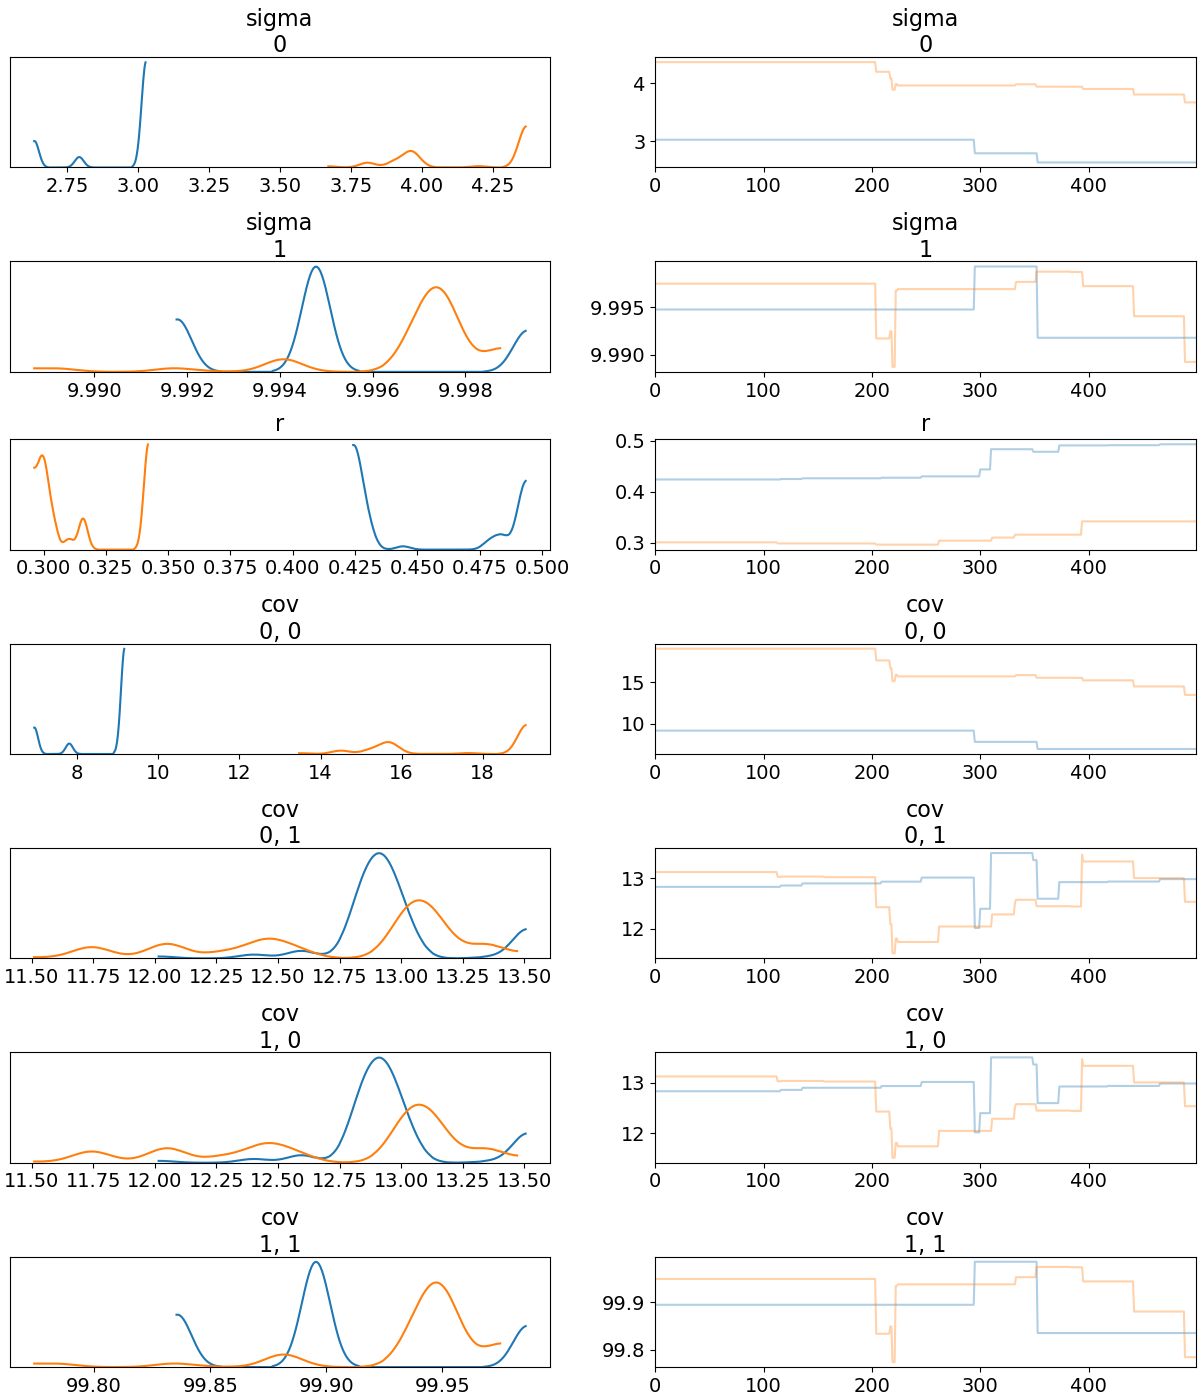

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002782982BE48>,
      dtype=object)

In [11]:
pm.traceplot(robust_trace)

<IPython.core.display.Javascript object>


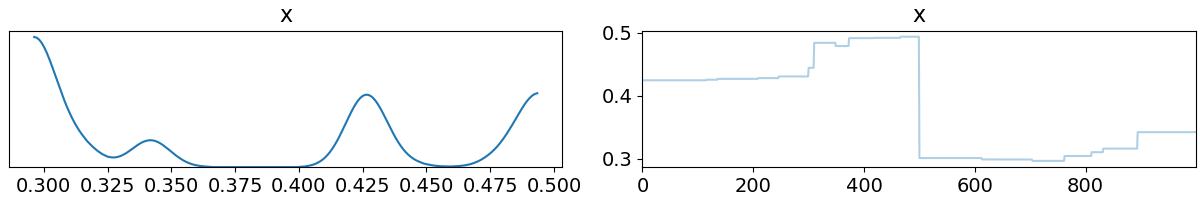

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002782A8BAC08>,
      dtype=object)

In [12]:
pm.traceplot(robust_trace['r'])